**Project Title:** **Predicting Client Subscription Using Machine Learning**


**Problem Statement**

A financial institution runs marketing campaigns to encourage clients to subscribe to long-term deposit accounts. However, reaching out to uninterested clients is costly and inefficient. The goal of this project was to build a machine learning model that accurately predicts whether a client will subscribe—helping the company target the right people and optimize their resources.

**Tools and Technologies**

Python

Pandas, NumPy (data manipulation)

Matplotlib & Seaborn (visualization)

Scikit-learn (modeling)

Random Forest Classifier (best performing model)

GridSearchCV (hyperparameter tuning)



**Process**

Loading the data

Checking for duplicates and missing values

Exploratory data analysis

Converted categorical data using one-hot encoding

Scaled numerical features

Split data into training and test sets (80/20)

Model Building & Tuning

Used GridSearchCV for hyperparameter tuning

Evaluated using Accuracy, Precision, Recall, and F1-score

Results


✅ Best Model: Random Forest Classifier

🎯 Accuracy: 82.7%

🔍 Recall for Subscriptions: 85% (very few missed actual subscribers)

🎯 Precision for Subscriptions: 80% (few false alarms)


This means the model can effectively help the company focus its efforts on likely subscribers, saving time and marketing budget.

**Key Insights**


The most influential features included: duration, contact type, previous campaign outcome, and number of contacts.

Clients who were previously contacted and had longer call durations were more likely to subscribe.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [5]:
df.duplicated().sum()

np.int64(0)

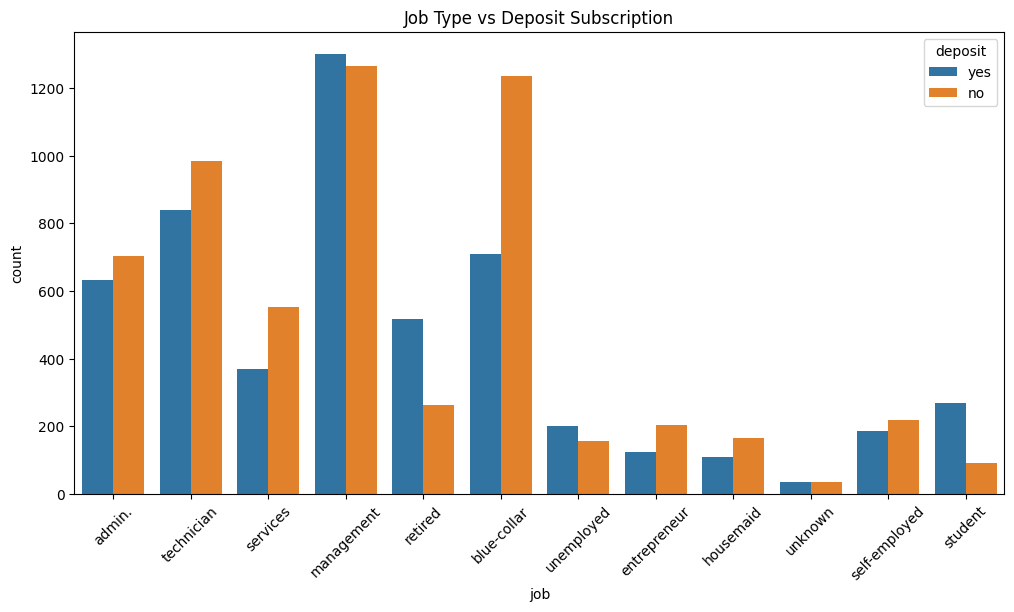

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='deposit')
plt.title('Job Type vs Deposit Subscription')
plt.xticks(rotation=45)
plt.show()


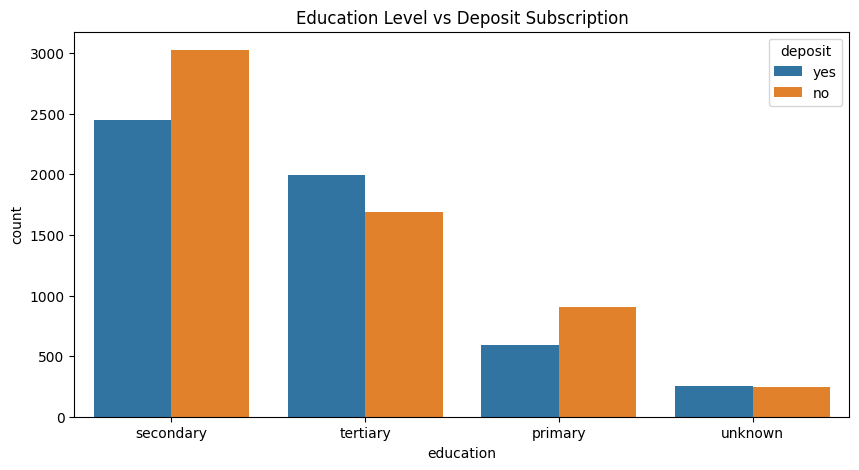

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='education', hue='deposit')
plt.title('Education Level vs Deposit Subscription')
plt.show()


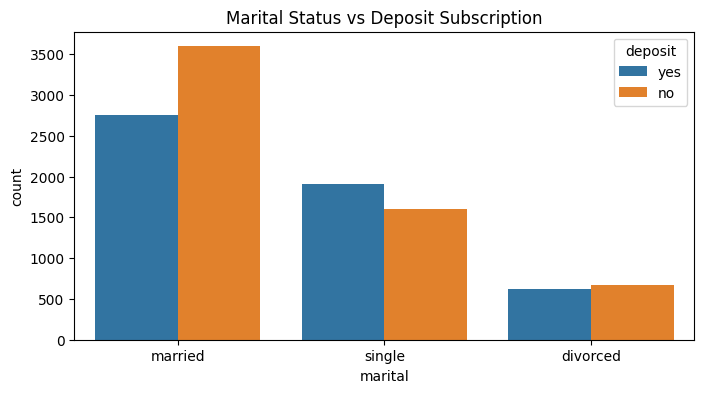

In [9]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='marital', hue='deposit')
plt.title('Marital Status vs Deposit Subscription')
plt.show()


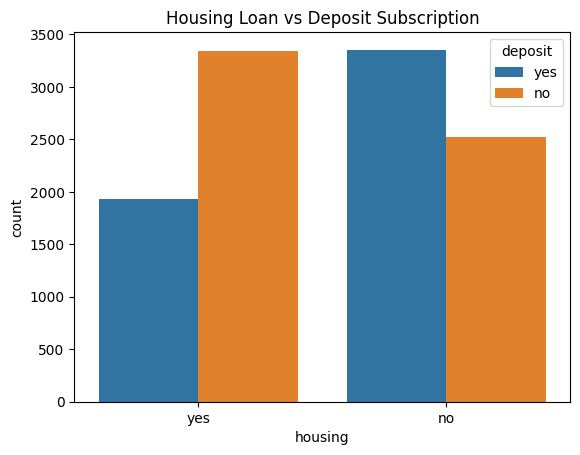

In [10]:
sns.countplot(data=df, x='housing', hue='deposit')
plt.title('Housing Loan vs Deposit Subscription')
plt.show()


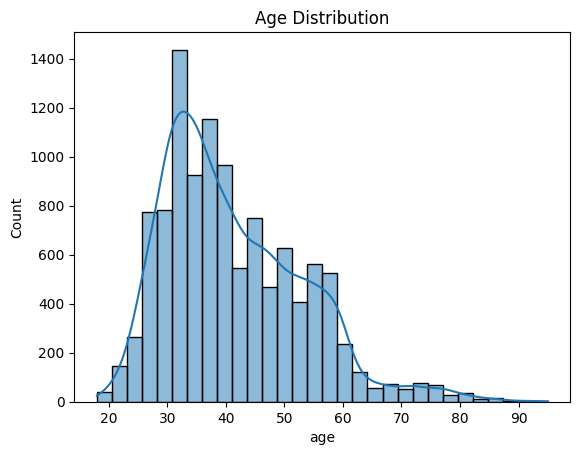

In [11]:
sns.histplot(data=df, x='age', kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


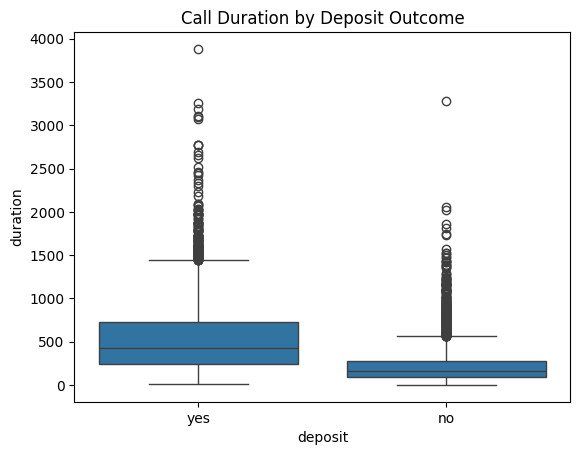

In [12]:
sns.boxplot(data=df, x='deposit', y='duration')
plt.title('Call Duration by Deposit Outcome')
plt.show()


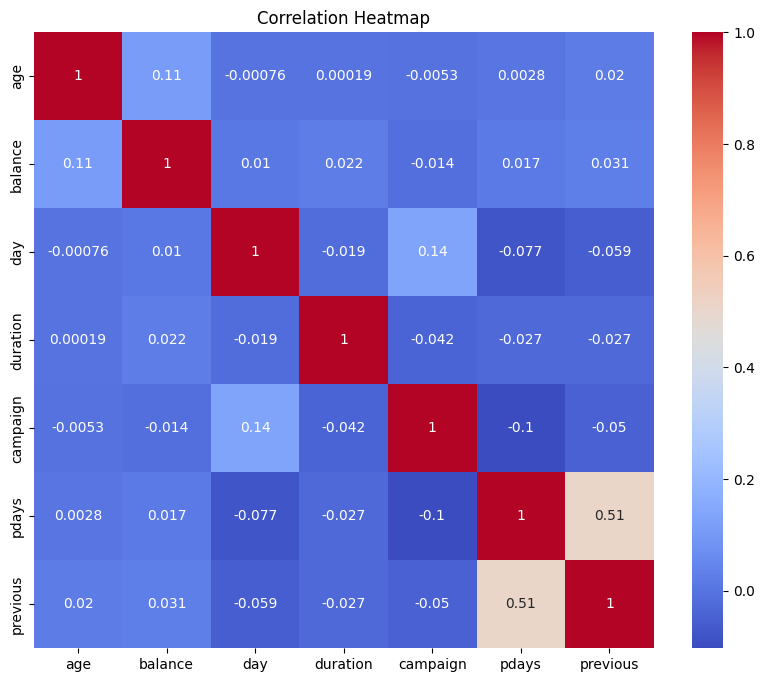

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


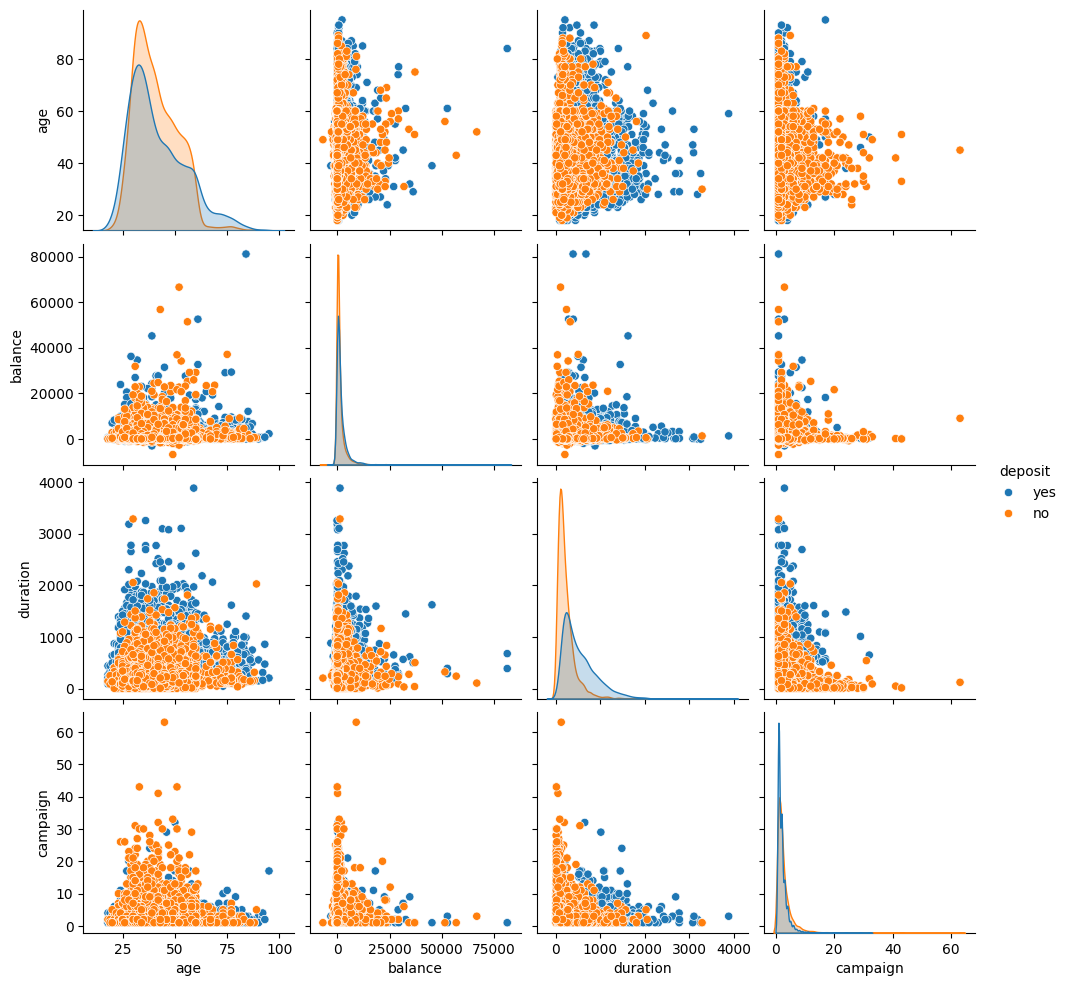

In [14]:
sns.pairplot(df[['age', 'balance', 'duration', 'campaign', 'deposit']], hue='deposit')
plt.show()


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = label_encoder.fit_transform(df[col])


In [17]:
print(df.columns.tolist())


['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


In [18]:
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']               # Target


In [19]:
from sklearn.preprocessing import LabelEncoder

# Make a copy so you don’t affect original data
X_encoded = X.copy()

# Apply LabelEncoder to each object column
label_encoder = LabelEncoder()
for column in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[column] = label_encoder.fit_transform(X_encoded[column])


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7630989699955217

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



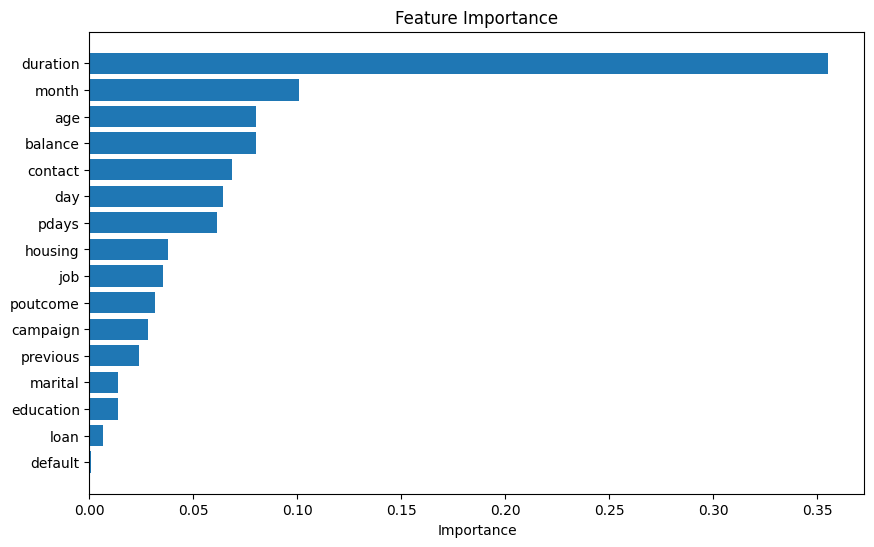

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_encoded.columns

# Create a DataFrame for easy sorting
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
grid = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [26]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=5)

In [27]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8266905508284819

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1166
           1       0.80      0.85      0.82      1067

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233

